In [1]:
import matplotlib.pyplot as plt
import numpy as np

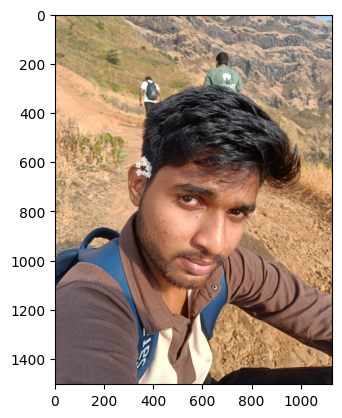

In [ ]:
original_img = plt.imread('your_image.jpg') #update to desired img
plt.imshow(original_img)

In [3]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (1504, 1128, 3)


In [4]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [5]:

def kMeans_init_centroids(X, K):
   
    randidx = np.random.permutation(X.shape[0])
    
    centroids = X[randidx[:K]]
    
    return centroids

In [6]:

def find_closest_centroids(X, centroids):

    K = centroids.shape[0]
    
    idx = np.zeros(X.shape[0], dtype=int) 
    
    for i in range(len(X)):
        dist=np.linalg.norm(X[i]-centroids,axis=1)
                
        idx[i]=np.argmin(dist)
    
    return idx

In [7]:
def compute_centroids(X, idx, K):
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
 
    for i in range(K):
        total=0
        idx_sum=np.zeros((1,n),dtype=int)
        for j in range(m):
            if idx[j]==i:
                total=total+1
                idx_sum=idx_sum+X[j]
        
        centroids[i]=idx_sum/total
   
    
    return centroids

In [8]:

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):

        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        idx = find_closest_centroids(X, centroids)
        
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [ ]:
K = 16
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [10]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (1696512,)
Closest centroid for the first five elements: [8 8 8 8 8]


In [11]:
idx = find_closest_centroids(X_img, centroids)

X_recovered = centroids[idx, :] 

X_recovered = np.reshape(X_recovered, original_img.shape) 
comp_img=np.clip(X_recovered,0,255).astype(np.uint8)

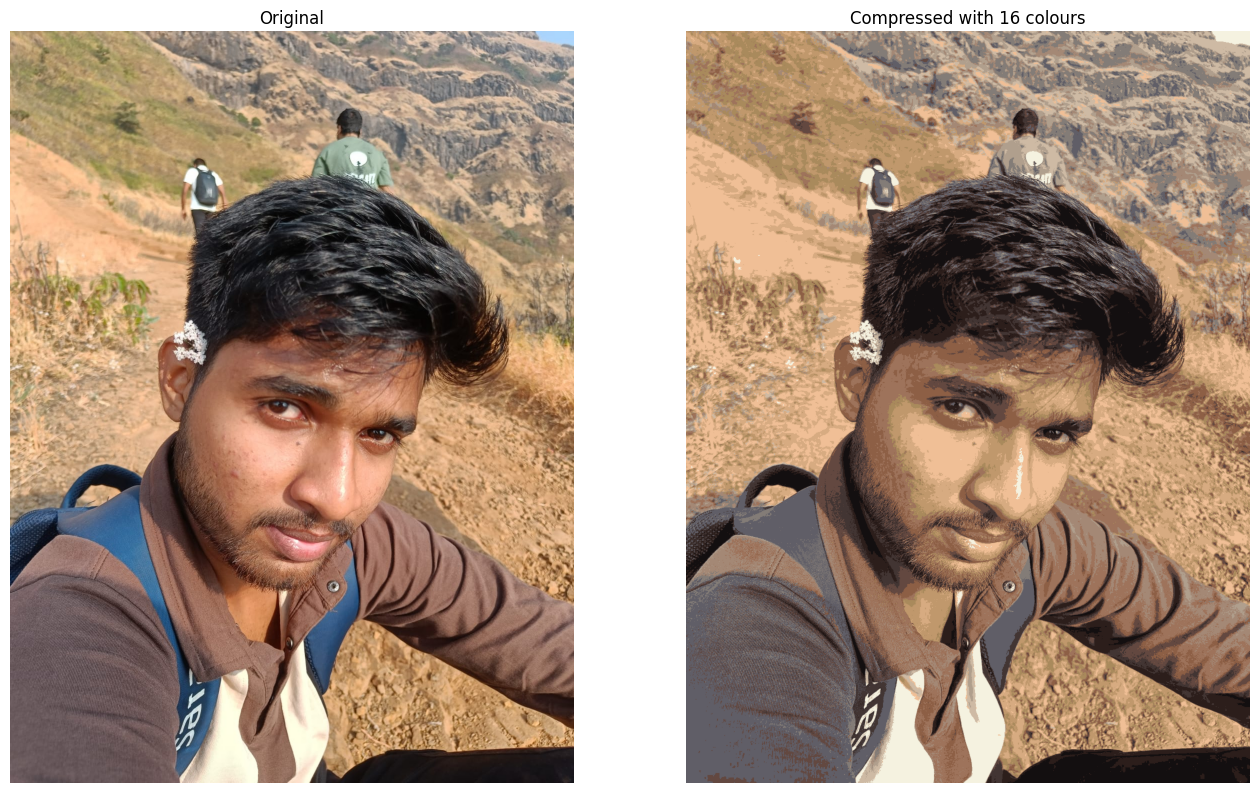

In [12]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

# Display compressed image
ax[1].imshow(comp_img)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()